# Business Objective : 
**Improve Movie Audience Satisfaction and Box Office Performance through Sentiment Analysis of IMDB Reviews.**



### Objective Description :

The goal of this project is to leverage sentiment analysis on the IMDB movie review dataset to gain insights into audience sentiments towards different movies.
By analyzing movie reviews, the objective is 

1. To identify the factors that contribute to positive and negative audience sentiments.

2. The findings will help movie studios and production companies make data-driven decisions to improve audience satisfaction and overall box office performance.

### Importing necessary libraries

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areebsayed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Data description

**Sentiment :** These are the labels for our data, It tells us that the review given by the person is positive or negative

**Review :** Review given by a person on the movies

### Read the data (csv)

In [4]:
df = pd.read_csv('Review.csv')

# Check first five rows of the data
df.head()

sentiment                                             review
0  Negative  I had no background knowledge of this movie be...
1  Negative  I am a huge Jane Austen fan and I ordered the ...
2  Negative  Nothing to say but Wow! Has anyone actually ha...
3  Negative  i like Jane Austin novels. I love Pride and Pr...
4  Negative  In this day and age of incredible special movi...

In [5]:
df.tail()

sentiment                                             review
9995  Positive  I first saw this movie back in the early'90's ...
9996  Positive  NYC, 2022: The Greenhouse effect, vanished oce...
9997  Positive  Those individuals familiar with Asian cinema, ...
9998  Positive  The kids, aged 7 to 14, got such a huge kick o...
9999  Positive  I so love this movie! The animation is great (...

In [6]:
# check the dimensions of the data 
df.shape

(10000, 2)

In [7]:
# check the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  object
 1   review     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [8]:
# statistical summary of the data 
df.describe()

sentiment                                             review
count      10000                                              10000
unique         2                                               9990
top     Negative  This show comes up with interesting locations ...
freq        5081                                                  3

In [9]:
# check nulls
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [10]:
# drop duplicate rows from the data 
df.drop_duplicates(inplace=True)
df.shape

(9990, 2)

# Exploratory Data Analysis (EDA)

In [11]:
# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

Negative    5073
Positive    4917
Name: sentiment, dtype: int64

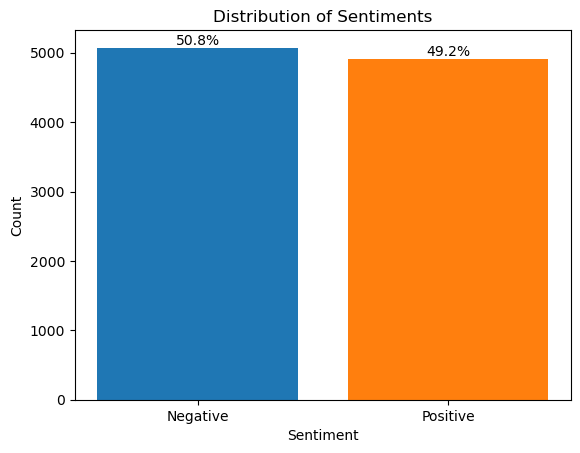

In [12]:
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=('tab:blue','tab:orange'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Add percentages on top of each bar
total = sum(sentiment_counts.values)
for i, count in enumerate(sentiment_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**Inference**

- The distribution of sentiments in our data is almost equally distributed. 

- Therefore, we can say that we have a balanced data 

# Data preprocessing

### Cleaning data

In [13]:
# Remove all the special characters
stop_words = set(stopwords.words('english'))
# Define a function to clean the text using regular expressions
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    return text

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
# Clean the 'review' column and apply the clean text function here
df['review'] = df['review'].apply(clean_text)
df['review'].head() 

0    background knowledge movie bought sounded cool...
1    huge jane austen fan ordered movie amazonuk co...
2    nothing say wow anyone actually somebody sneak...
3    like jane austin novels love pride prejudice s...
4    day age incredible special movie effects one s...
Name: review, dtype: object

## WordCloud

### WordCloud for whole data 

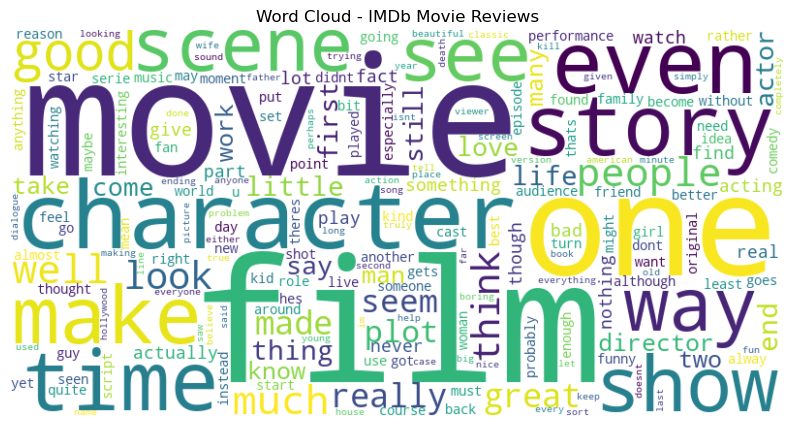

In [16]:
# Combine all the reviews into a single string
all_reviews = ' '.join(df['review'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - IMDb Movie Reviews')
plt.show()

In [17]:
df.sentiment = df.sentiment.astype('object')

In [18]:
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "Positive" else 0 for each in df.sentiment]

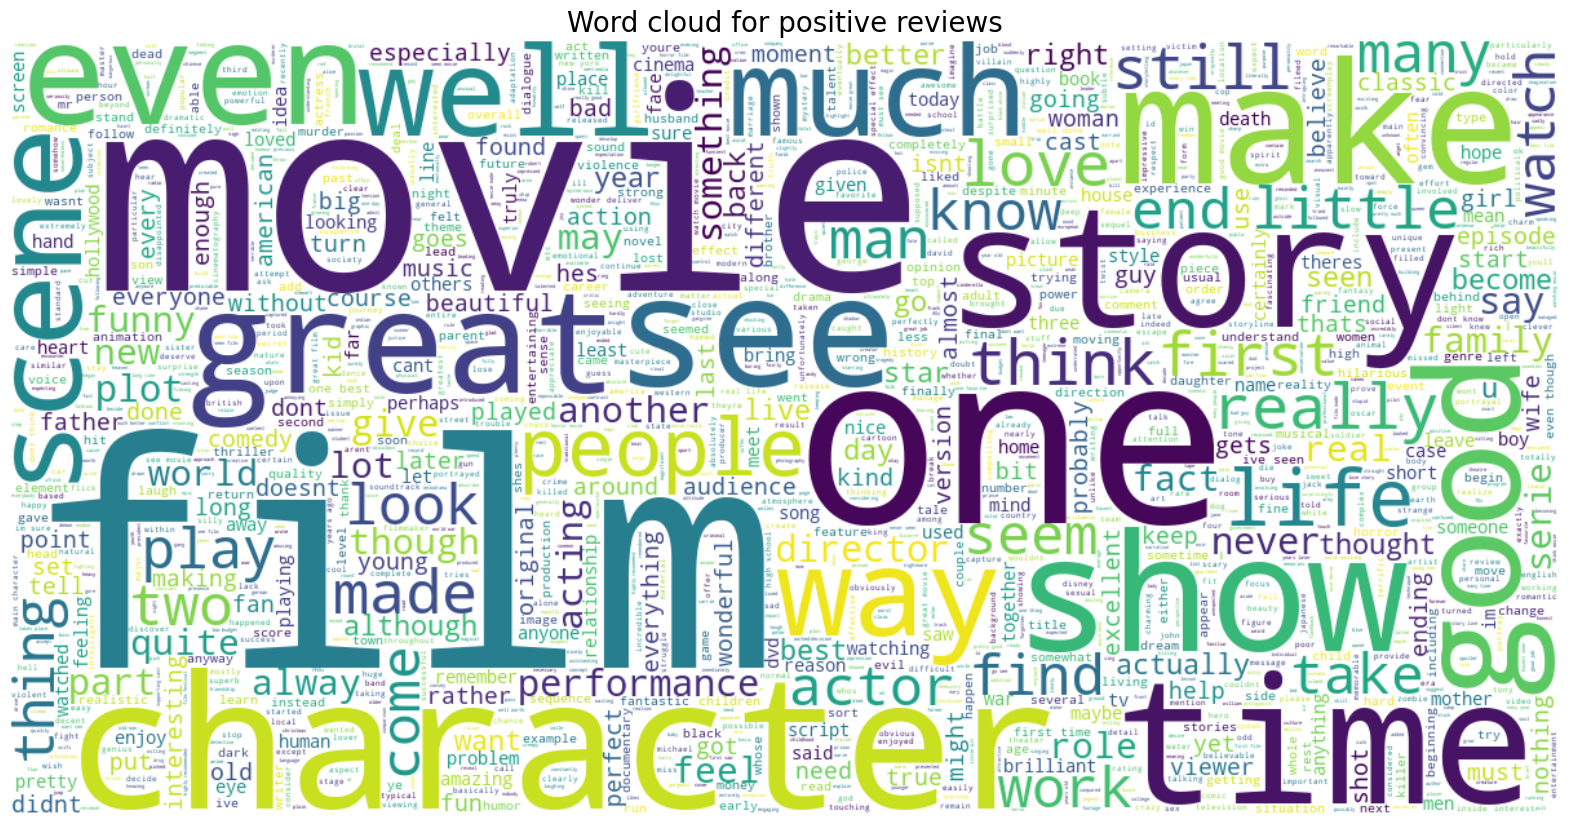

In [19]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

### WordCloud for negative sentiments

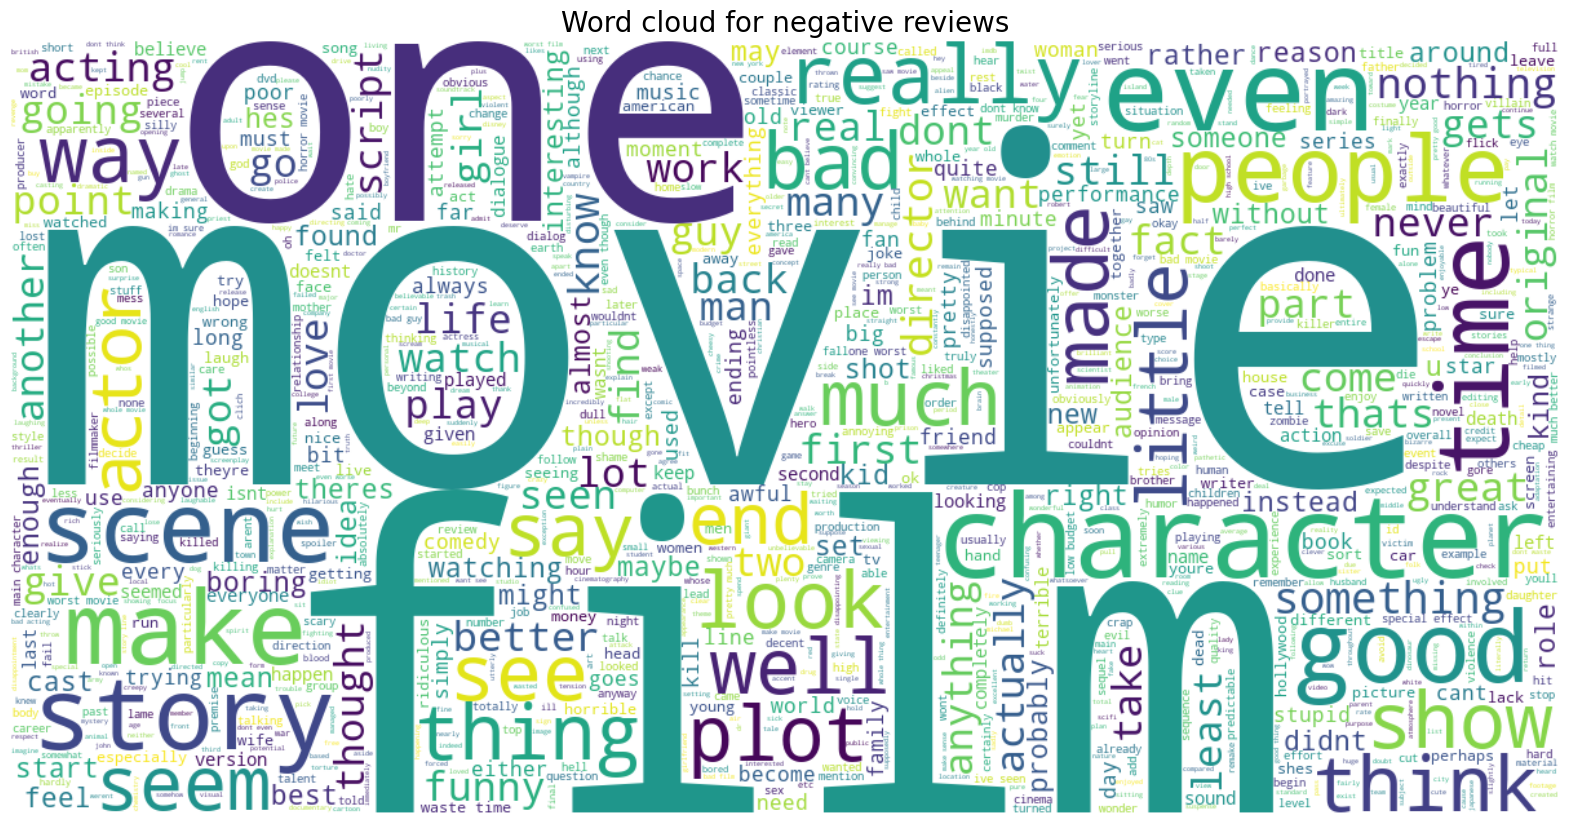

In [20]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

### Number of characters in each review

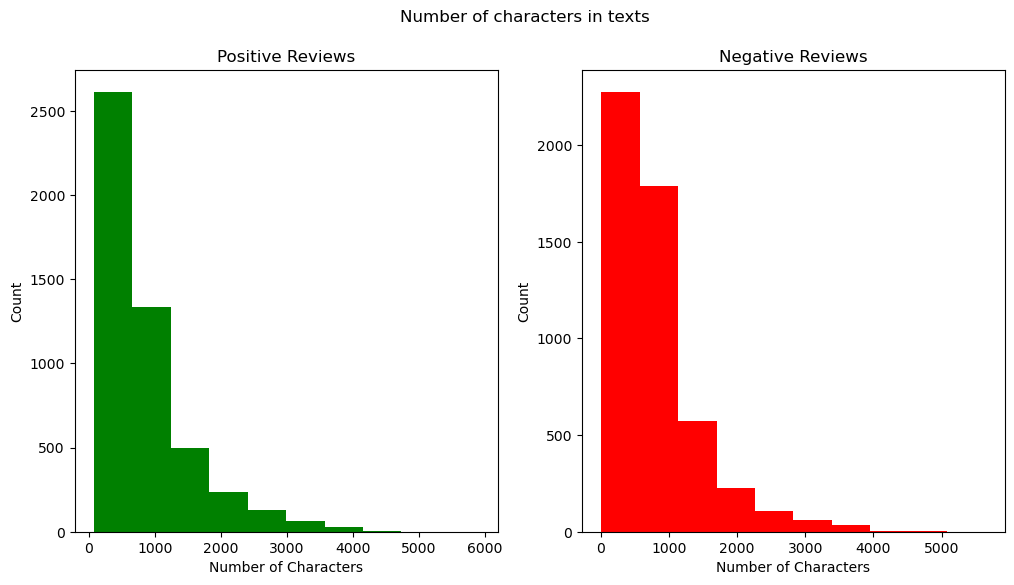

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

**Inference :**

Number of characters in negative reviews is higher which means the length of negative reviews are higher than compare to positive reviews.

### Number of words in each review

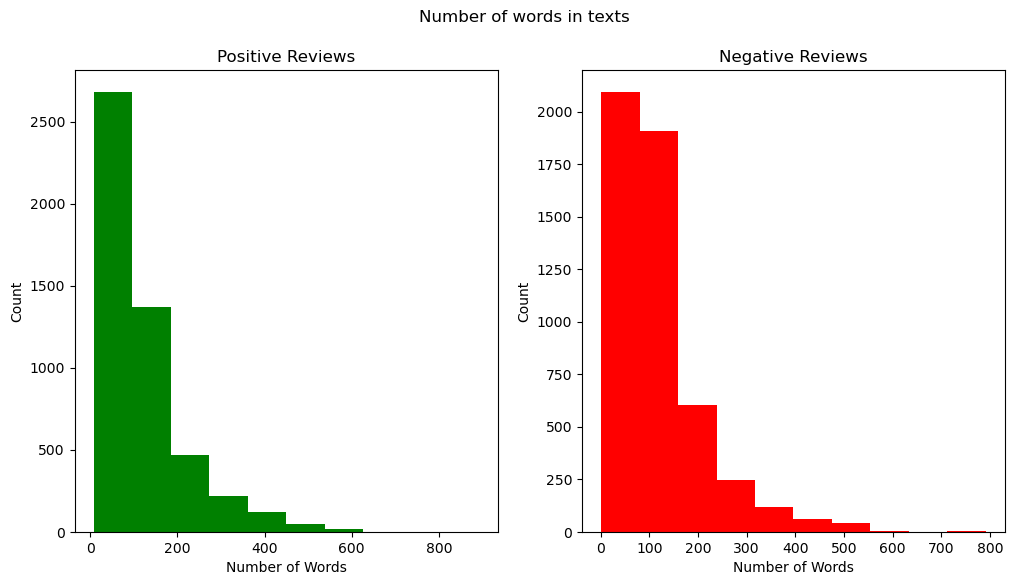

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

**Inference :**

- The number of negative words in a review compared to number of positive words are greater.
- The number of positive reviews are greater than number of negative words.

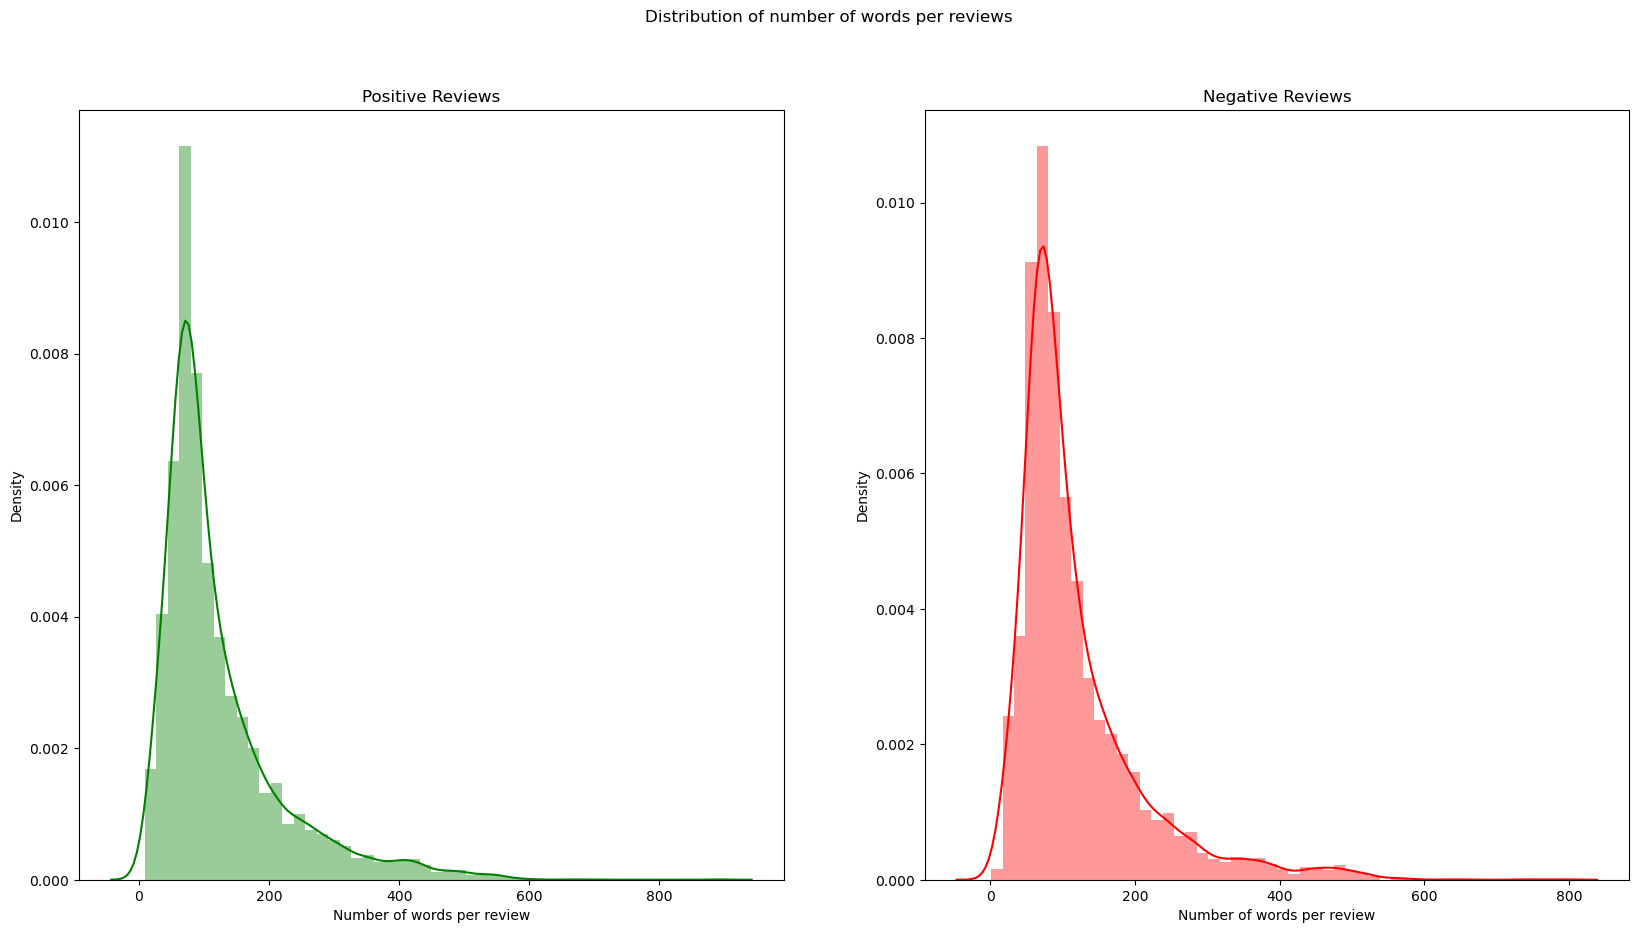

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

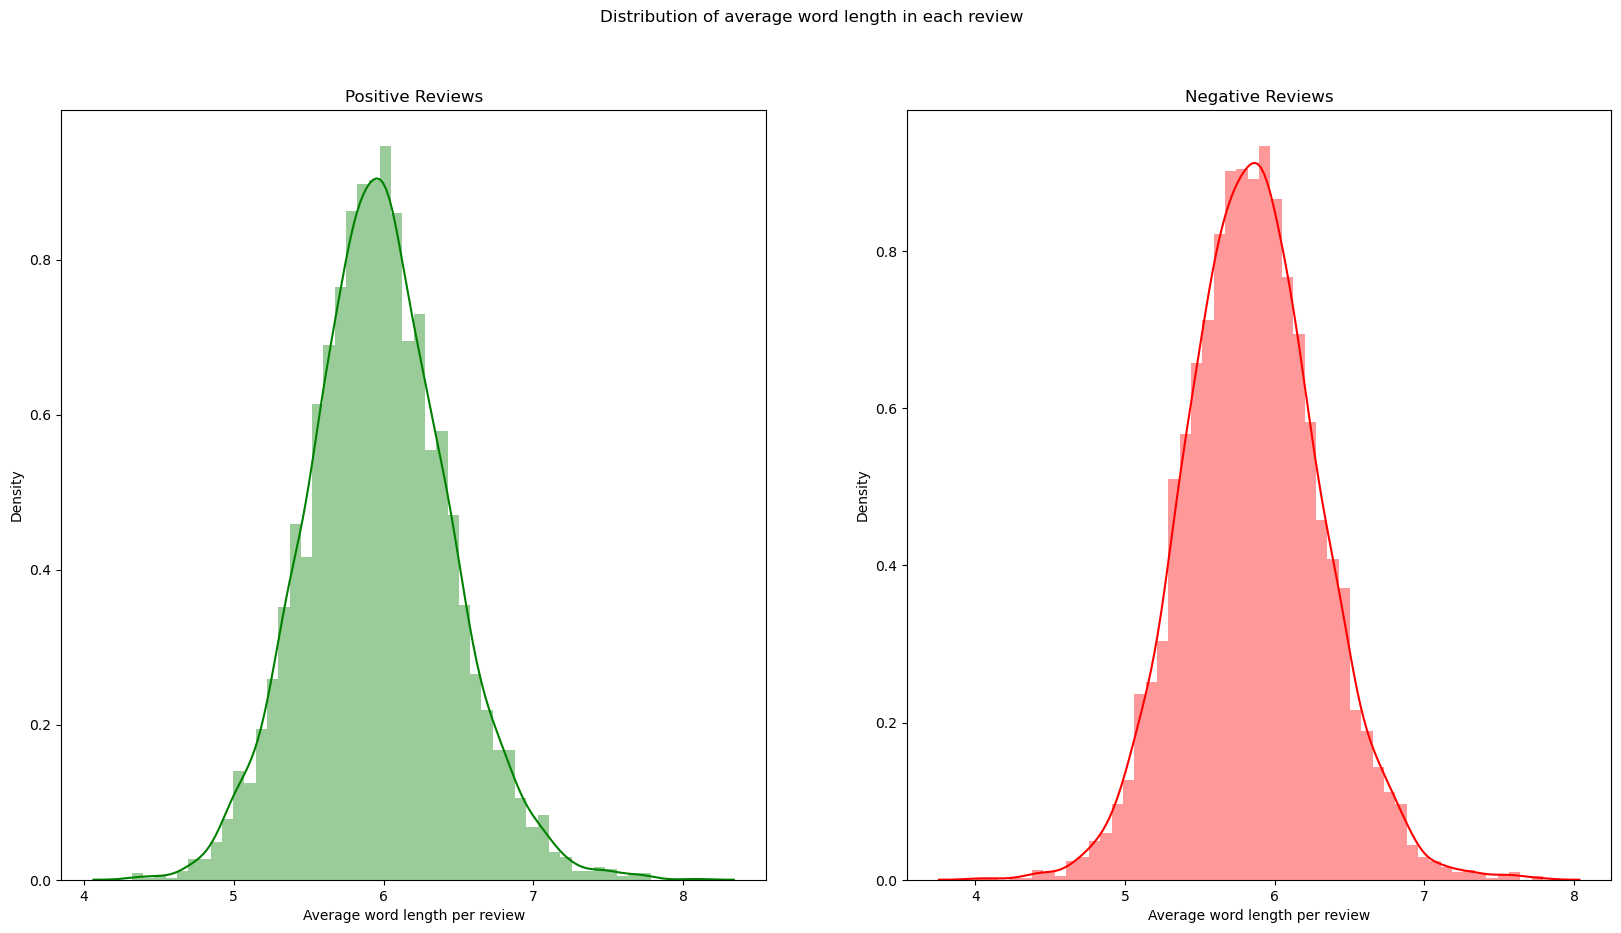

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

**Inference :**
    
The average word length is normally distributed across every review 

#### Removing white spaces 

In [25]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['background', 'knowledge', 'movie', 'bought', 'sounded']

**Note :** These are the first five words of the first review

#### Count of 10 most frequent words

In [26]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0   movie   16892
1    film   14997
2     one   10326
3    like    7748
4    good    5732
5    even    5011
6    time    4820
7   would    4818
8   story    4729
9  really    4698

These are the count most frequent words across the whole data 

In [27]:
most_common = most_common.sort_values('countv')

### Most Frequent words plot

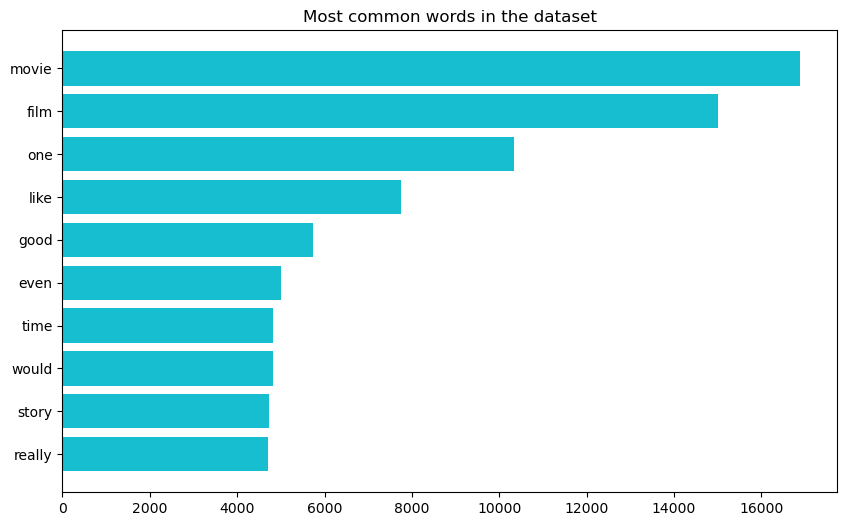

In [28]:
plt.figure(figsize =(10,6))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'tab:cyan')
plt.title('Most common words in the dataset')
plt.show()

**Inferences :**
    
Since it is IMBD review data it makes sense that the words like 'movie', 'film', 'story' will be most frequent plots.

### N_gram plots ( most frequent n words)

This function will give you the plots of n cosecutive most frequent words used together in a sequence 

In [29]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

### Unigram analysis (most frequent one word)

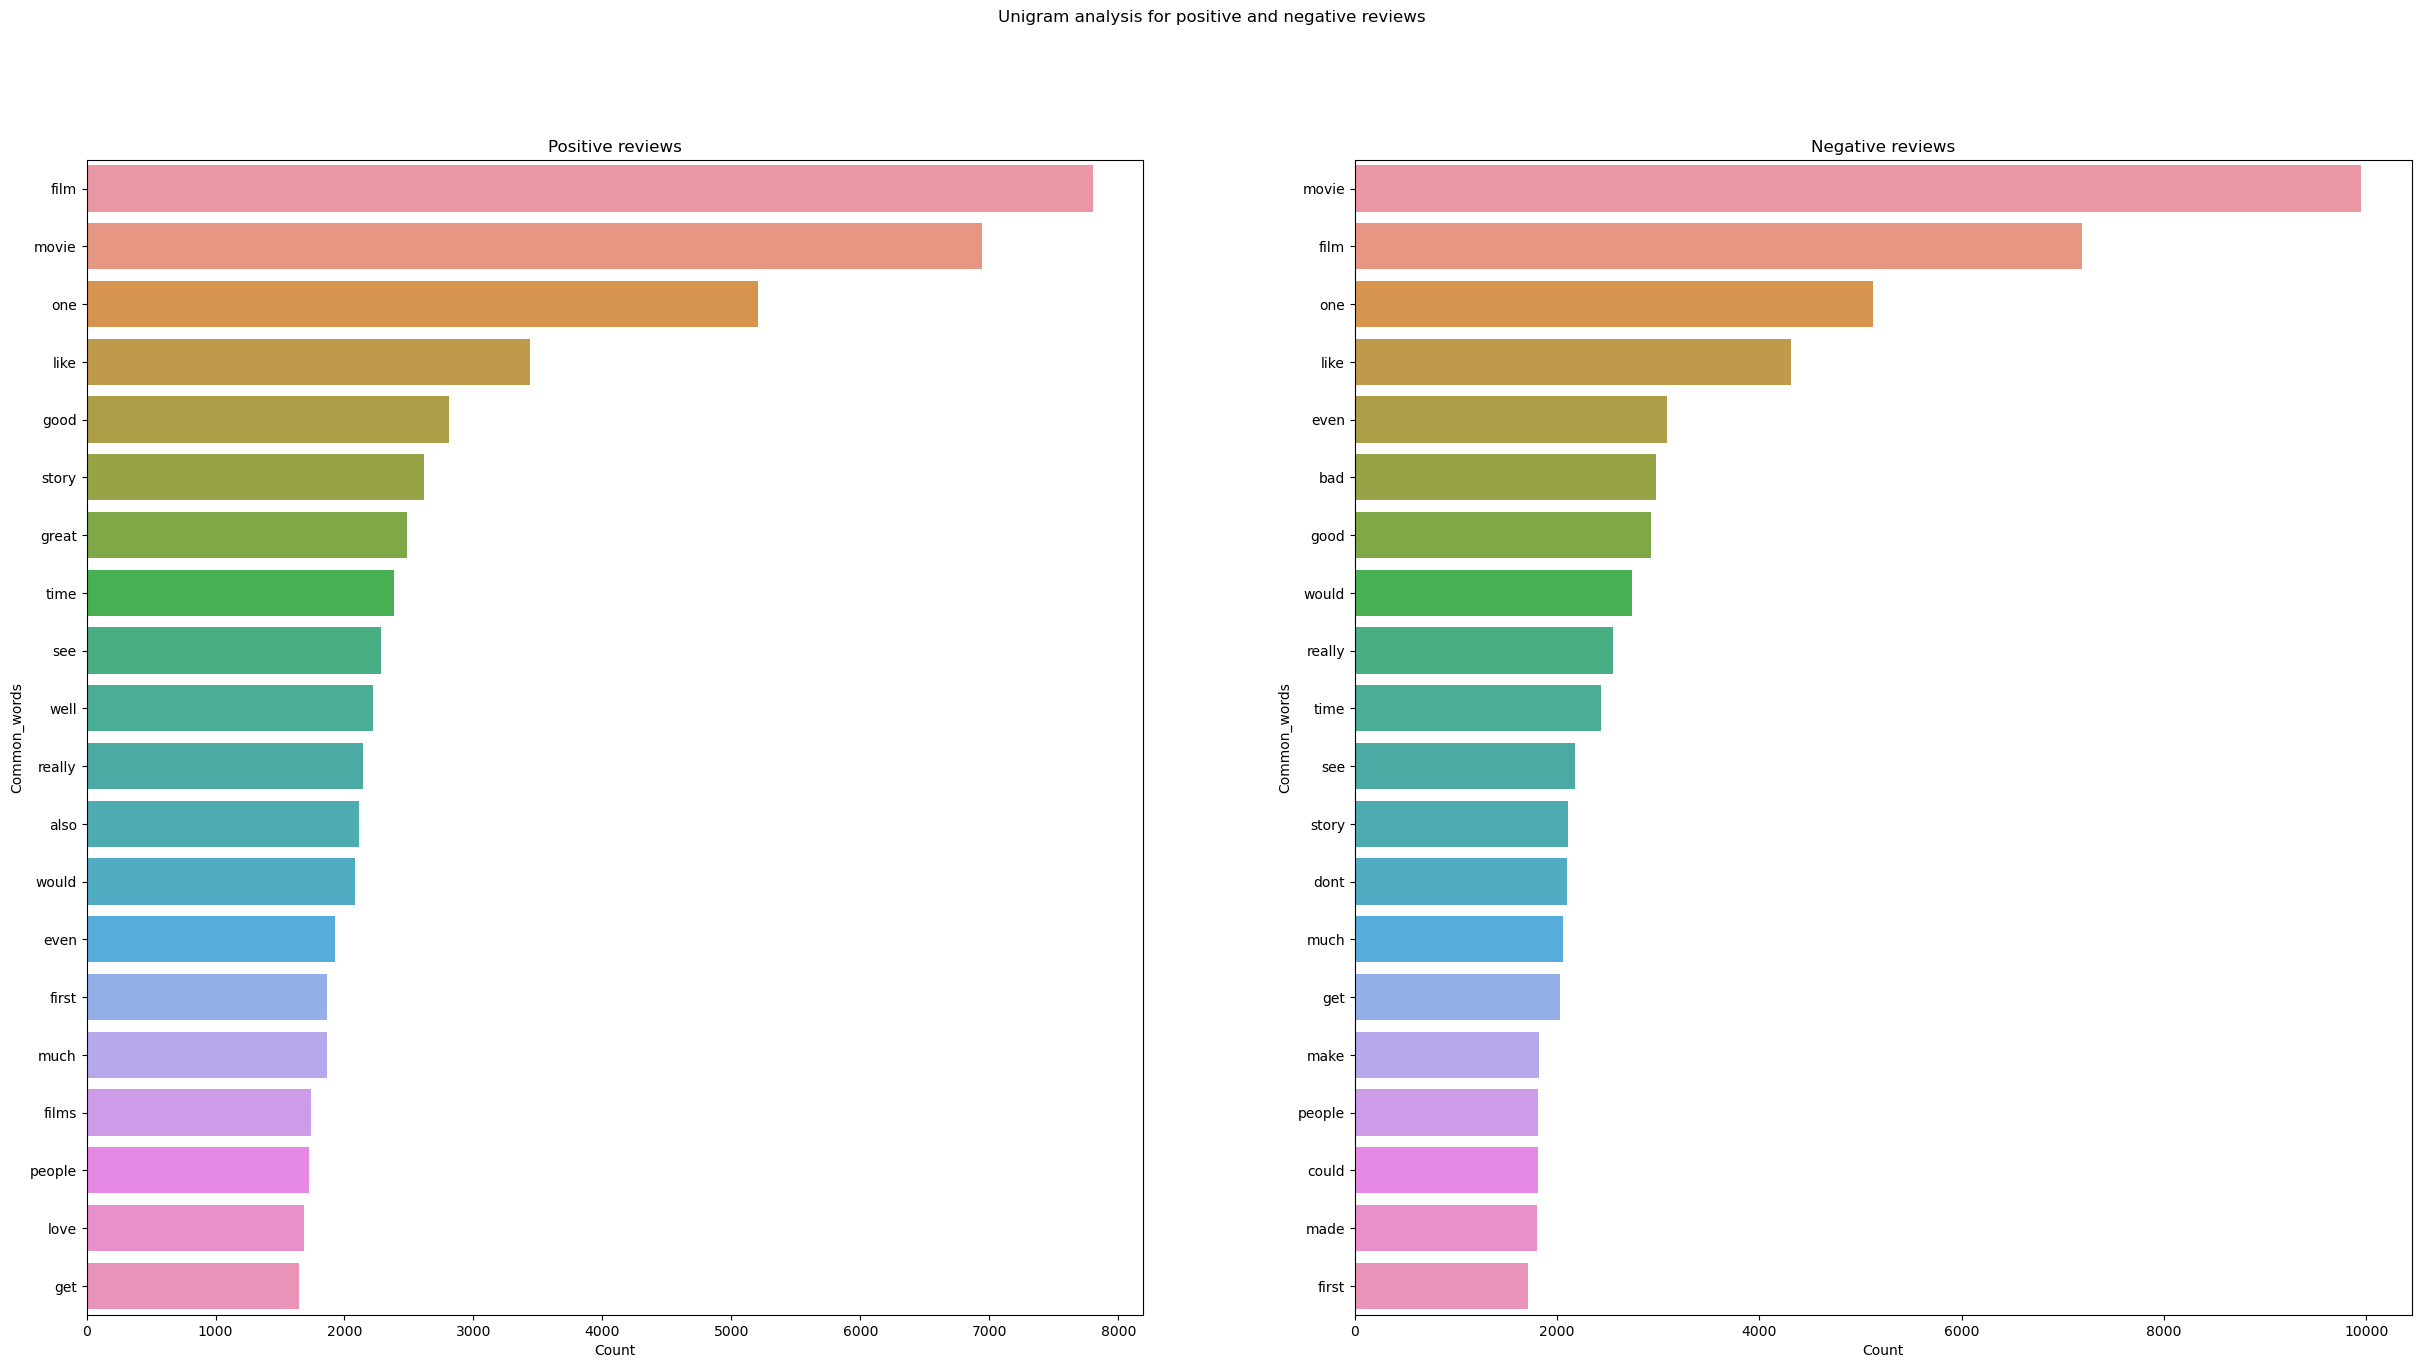

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


### Bigram analysis (most frequent two words)

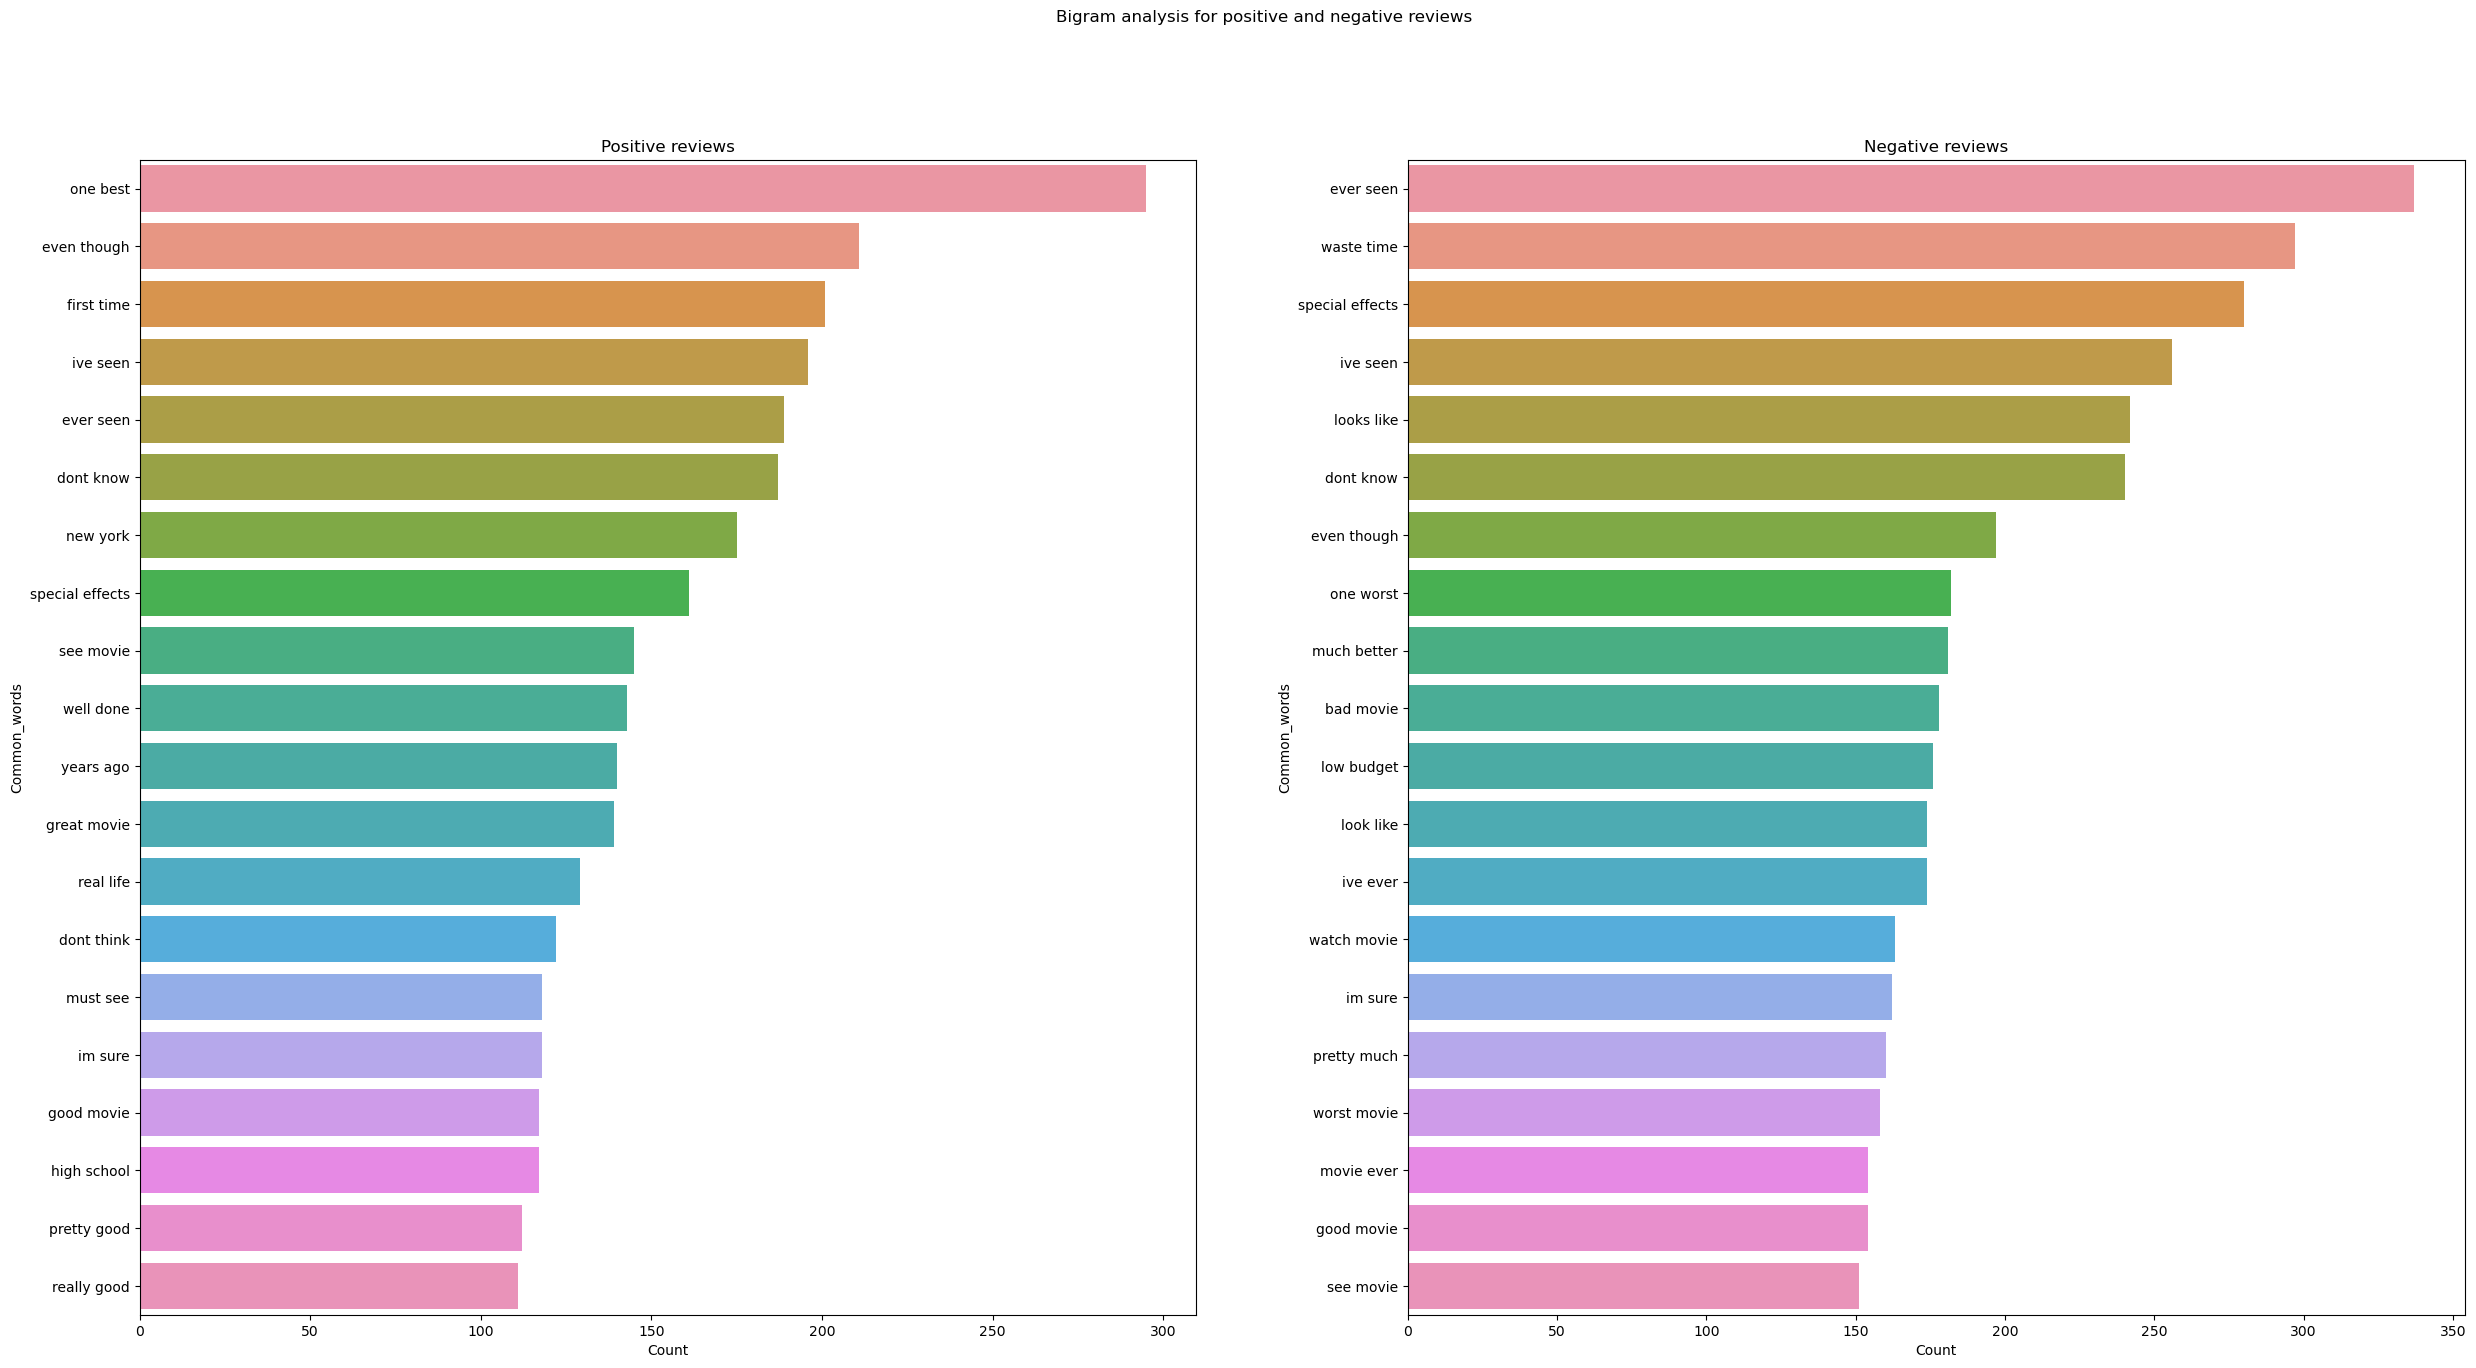

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

### trigram analysis (most frequent three word)

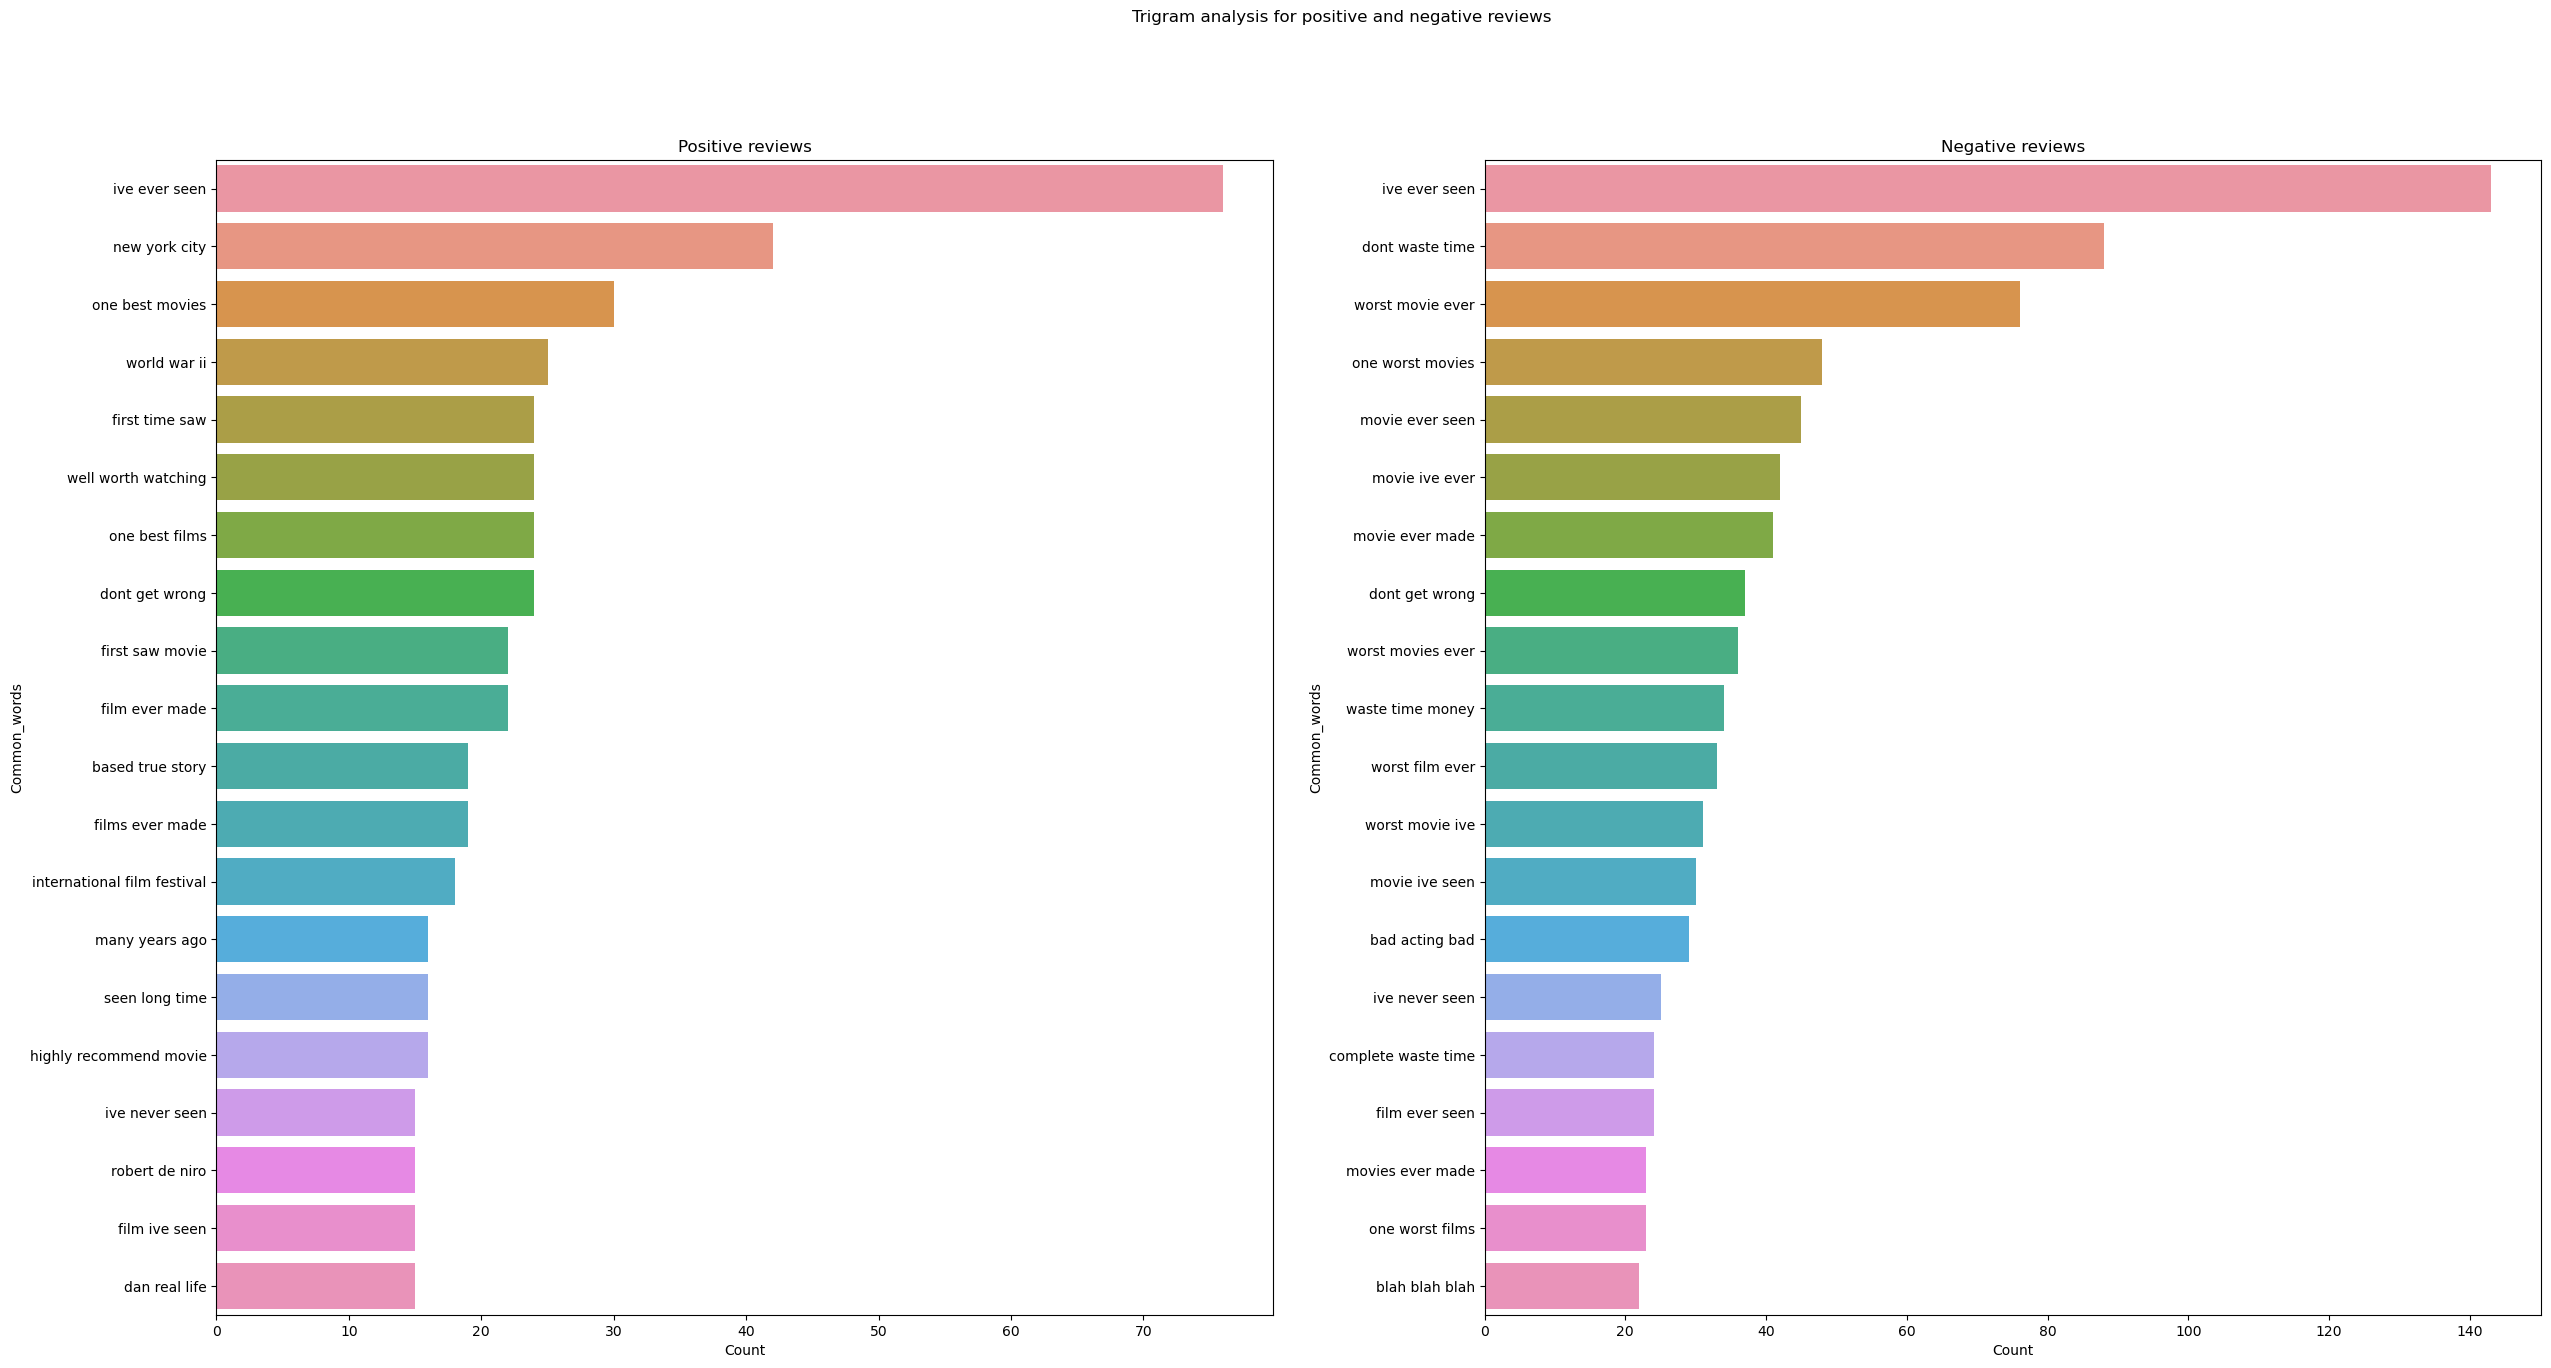

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [33]:
# Check if the stopwords, special characters, extra spaces has removed or not
# check if the data is in lowercase or not
df.review

0       background knowledge movie bought sounded cool...
1       huge jane austen fan ordered movie amazonuk co...
2       nothing say wow anyone actually somebody sneak...
3       like jane austin novels love pride prejudice s...
4       day age incredible special movie effects one s...
                              ...                        
9995    first saw movie back early90s first released r...
9996    nyc 2022 greenhouse effect vanished oceans gri...
9997    individuals familiar asian cinema whole aware ...
9998    kids aged 7 14 got huge kick film gave copy ki...
9999    love movie animation great pokmon movie cgi lo...
Name: review, Length: 9990, dtype: object

First and last five reviews of the data 

# Label Encoding

In [34]:
#unique values of labels
label_encoder = LabelEncoder()
# Fit label encoder and transform the 'category' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

## Split the data 

In [35]:
#split target and features 
y = df['sentiment']
X = df.review

## Train-test split

In [36]:
# split the feature & target in 80% train & 20% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7992,), (1998,), (7992,), (1998,))

In [37]:
#Applying count vectorizer
vectorizer = CountVectorizer()

# fit and transform train test vectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [38]:
# check dtype and format
X_train_vec, X_test_vec

(<7992x62621 sparse matrix of type '<class 'numpy.int64'>'
 	with 800706 stored elements in Compressed Sparse Row format>,
 <1998x62621 sparse matrix of type '<class 'numpy.int64'>'
 	with 192412 stored elements in Compressed Sparse Row format>)

# Modelling with Latent Semantic Analysis (LSA) 

In [39]:
# Perform Latent Semantic Analysis (LSA) on the TF-IDF data
n_components = 100
lsa_model = TruncatedSVD(n_components=n_components)

### Multinomial Naive Bayes (Multinomial-NB)

In [40]:
#Applying Tf-Idf transformation and building a model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Building a model using Naive Bayes(MultinomialNB)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf,y_train)

MultinomialNB()

### LSA model with tf - idf

In [41]:
# Fit LSA model on the training TF-IDF data
X_train_lsa = lsa_model.fit_transform(X_train_tfidf)

# Transform the test TF-IDF data using the fitted LSA model
X_test_lsa = lsa_model.transform(X_test_tfidf)

### Logistic Regression with LSA

In [42]:
# Initialize models
logistic_regression_model = LogisticRegression()

# Fit the models on the LSA-transformed training data
logistic_regression_model.fit(X_train_lsa, y_train)

# Make predictions on the LSA-transformed test data
y_pred_logreg_train = logistic_regression_model.predict(X_train_lsa)# Evaluate the models' performance

# Make predictions on the LSA-transformed test data
y_pred_logreg_test = logistic_regression_model.predict(X_test_lsa)# Evaluate the models' performance

# calculate accuracy for train dataset
acc_logreg_train = accuracy_score(y_train, y_pred_logreg_train)

# calculate accuracy for test dataset
acc_logreg_test = accuracy_score(y_test, y_pred_logreg_test)

# Print the accuracies
print("Accuracy (train) - Logistic Regression: {:.2f}%".format(acc_logreg_train * 100))
print("Accuracy (test) - Logistic Regression: {:.2f}%".format(acc_logreg_test * 100))

Accuracy (train) - Logistic Regression: 84.87%
Accuracy (test) - Logistic Regression: 83.93%


In [44]:
# Calculate predictions for the training data
y_train_pred_logreg = logistic_regression_model.predict(X_train_lsa)

# Calculate predictions for the test data
y_test_pred_logreg = logistic_regression_model.predict(X_test_lsa)

# Calculate metrics for the training data
acc_train_logreg = accuracy_score(y_train, y_train_pred_logreg)
precision_train_logreg = precision_score(y_train, y_train_pred_logreg)
precision_negatives_train = precision_score(y_train, y_train_pred_logreg, pos_label=0)
recall_train_logreg = recall_score(y_train, y_train_pred_logreg)
f1_train_logreg = f1_score(y_train, y_train_pred_logreg)
conf_matrix_train_logreg = confusion_matrix(y_train, y_train_pred_logreg)
tn, fp, fn, tp = conf_matrix_train_logreg.ravel()
recall_negatives_train = tn / (tn + fp)


# Calculate metrics for the test data
acc_test_logreg = accuracy_score(y_test, y_test_pred_logreg)
precision_test_logreg = precision_score(y_test, y_test_pred_logreg)
precision_negatives_test = precision_score(y_test, y_test_pred_logreg, pos_label=0)
recall_test_logreg = recall_score(y_test, y_test_pred_logreg)
f1_test_logreg = f1_score(y_test, y_test_pred_logreg)
conf_matrix_test_logreg = confusion_matrix(y_test, y_test_pred_logreg)
tn, fp, fn, tp = conf_matrix_test_logreg.ravel()
recall_negatives_test = tn / (tn + fp)


# Print metrics for training data
print("Training Data Metrics:")
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_train_logreg * 100))
print("Precision - Logistic Regression: {:.2f}".format(precision_train_logreg))
print("Recall - Logistic Regression: {:.2f}".format(recall_train_logreg))
print("F1-Score - Logistic Regression: {:.2f}".format(f1_train_logreg))
print("Confusion Matrix - Logistic Regression:\n", conf_matrix_train_logreg)
print("Recall for Negatives (train): {:.2f}".format(recall_negatives_train))
print("Precision for Negatives (train): {:.2f}".format(precision_negatives_train))



# Print metrics for test data
print("\nTest Data Metrics:")
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_test_logreg * 100))
print("Precision - Logistic Regression: {:.2f}".format(precision_test_logreg))
print("Recall - Logistic Regression: {:.2f}".format(recall_test_logreg))
print("F1-Score - Logistic Regression: {:.2f}".format(f1_test_logreg))
print("Confusion Matrix - Logistic Regression:\n", conf_matrix_test_logreg)
print("Recall for Negatives (test): {:.2f}".format(recall_negatives_test))
print("Precision for Negatives (test): {:.2f}".format(precision_negatives_test))


Training Data Metrics:
Accuracy - Logistic Regression: 84.87%
Precision - Logistic Regression: 0.83
Recall - Logistic Regression: 0.87
F1-Score - Logistic Regression: 0.85
Confusion Matrix - Logistic Regression:
 [[3360  685]
 [ 524 3423]]
Recall for Negatives (train): 0.83
Precision for Negatives (train): 0.87

Test Data Metrics:
Accuracy - Logistic Regression: 83.93%
Precision - Logistic Regression: 0.81
Recall - Logistic Regression: 0.87
F1-Score - Logistic Regression: 0.84
Confusion Matrix - Logistic Regression:
 [[833 195]
 [126 844]]
Recall for Negatives (test): 0.81
Precision for Negatives (test): 0.87


In [45]:
# Assuming you have the confusion matrix for the test data as conf_matrix_test_logreg
tn, fp, fn, tp = conf_matrix_train_logreg.ravel()

# Calculate recall for negatives (True Negative Rate)
recall_negatives = tn / (tn + fp)

# Print the recall for negatives
print("Recall (train) for Negatives: {:.2f}".format(recall_negatives))

# Assuming you have the confusion matrix for the test data as conf_matrix_test_logreg
tn, fp, fn, tp = conf_matrix_test_logreg.ravel()

# Calculate recall for negatives (True Negative Rate)
recall_negatives = tn / (tn + fp)

# Print the recall for negatives
print("Recall (test) for Negatives: {:.2f}".format(recall_negatives))


Recall (train) for Negatives: 0.83
Recall (test) for Negatives: 0.81


**Negative Precision:** A high negative precision means that when the model predicts a review as negative, it is highly accurate. This is important because falsely labeling a review as negative could lead to an undeserved negative reputation for a movie, impacting its audience reception and box office performance.

**Negative Recall:** High negative recall indicates that the model can capture a significant proportion of actual negative reviews. This is crucial because missing negative reviews (false negatives) might overlook legitimate criticisms or issues that need improvement. Addressing these concerns can lead to better decision-making by movie studios and improved audience satisfaction.

In summary, negative precision helps in avoiding unjustified negative judgments, while negative recall ensures that no substantial negative feedback goes unnoticed, enabling studios to address issues and enhance movie quality for better audience reception and box office success.






### Random Forest (RF) with LSA

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier instance
random_forest_model = RandomForestClassifier()

# Make predictions on # Fit the random_forest_model on the LSA-transformed training data
random_forest_model.fit(X_train_lsa, y_train)

# Make predictions on the LSA-transformed training data
y_pred_rf_train = random_forest_model.predict(X_train_lsa)

# Make predictions on the LSA-transformed test data
y_pred_rf_test = random_forest_model.predict(X_test_lsa)

# Calculate accuracy for the training dataset
acc_rf_train = accuracy_score(y_train, y_pred_rf_train)

# Calculate accuracy for the test dataset
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)

## Print the accuracies for Random Forest
print("Accuracy - Random Forest of train data: {:.2f}%".format(acc_rf_train * 100))
print("Accuracy - Random Forest of test data: {:.2f}%".format(acc_rf_test * 100))

Accuracy - Random Forest of train data: 100.00%
Accuracy - Random Forest of test data: 80.98%


In [46]:
# Calculate predictions for the training data
y_train_pred_rf = random_forest_model.predict(X_train_lsa)

# Calculate predictions for the test data
y_test_pred_rf = random_forest_model.predict(X_test_lsa)

# Calculate metrics for the training data
acc_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
precision_negatives_train_rf = precision_score(y_train, y_train_pred_rf, pos_label=0)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
tn, fp, fn, tp = conf_matrix_train_rf.ravel()
recall_negatives_train_rf = tn / (tn + fp)

# Calculate metrics for the test data
acc_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
precision_negatives_test_rf = precision_score(y_test, y_test_pred_rf, pos_label=0)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
tn, fp, fn, tp = conf_matrix_test_rf.ravel()
recall_negatives_test_rf = tn / (tn + fp)

# Print metrics for training data
print("Training Data Metrics - Random Forest:")
print("Accuracy: {:.2f}%".format(acc_train_rf * 100))
print("Precision: {:.2f}".format(precision_train_rf))
print("Recall: {:.2f}".format(recall_train_rf))
print("F1-Score: {:.2f}".format(f1_train_rf))
print("Confusion Matrix:\n", conf_matrix_train_rf)
print("Recall for Negatives (train): {:.2f}".format(recall_negatives_train_rf))
print("Precision for Negatives (train): {:.2f}".format(precision_negatives_train_rf))

# Print metrics for test data
print("\nTest Data Metrics - Random Forest:")
print("Accuracy: {:.2f}%".format(acc_test_rf * 100))
print("Precision: {:.2f}".format(precision_test_rf))
print("Recall: {:.2f}".format(recall_test_rf))
print("F1-Score: {:.2f}".format(f1_test_rf))
print("Confusion Matrix:\n", conf_matrix_test_rf)
print("Recall for Negatives (test): {:.2f}".format(recall_negatives_test_rf))
print("Precision for Negatives (test): {:.2f}".format(precision_negatives_test_rf))


Training Data Metrics - Random Forest:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
 [[4045    0]
 [   0 3947]]
Recall for Negatives (train): 1.00
Precision for Negatives (train): 1.00

Test Data Metrics - Random Forest:
Accuracy: 81.58%
Precision: 0.80
Recall: 0.82
F1-Score: 0.81
Confusion Matrix:
 [[835 193]
 [175 795]]
Recall for Negatives (test): 0.81
Precision for Negatives (test): 0.83


### Gradient Boosting Machines (GBM) with LSA

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# Create a Gradient Boosting Classifier instance
gradient_boosting_model = GradientBoostingClassifier()
# Fit the gradient_boosting_model on the LSA-transformed training data
gradient_boosting_model.fit(X_train_lsa, y_train)

# Make predictions on the LSA-transformed training data
y_pred_gbm_train = gradient_boosting_model.predict(X_train_lsa)

# Make predictions on the LSA-transformed test data
y_pred_gbm_test = gradient_boosting_model.predict(X_test_lsa)

# Calculate accuracy for the training dataset
acc_gbm_train = accuracy_score(y_train, y_pred_gbm_train)

# Calculate accuracy for the test dataset
acc_gbm_test = accuracy_score(y_test, y_pred_gbm_test)

# Print the accuracies for Gradient Boosting Machine
print("Accuracy - Gradient Boosting of train data: {:.2f}%".format(acc_gbm_train * 100))
print("Accuracy - Gradient Boosting of test data: {:.2f}%".format(acc_gbm_test * 100))

Accuracy - Gradient Boosting of train data: 86.94%
Accuracy - Gradient Boosting of test data: 82.23%


In [48]:
# Calculate metrics for the training data
acc_gbm_train = accuracy_score(y_train, y_pred_gbm_train)
precision_gbm_train = precision_score(y_train, y_pred_gbm_train)
precision_negatives_gbm_train = precision_score(y_train, y_pred_gbm_train, pos_label=0)
recall_gbm_train = recall_score(y_train, y_pred_gbm_train)
f1_gbm_train = f1_score(y_train, y_pred_gbm_train)
conf_matrix_gbm_train = confusion_matrix(y_train, y_pred_gbm_train)
tn, fp, fn, tp = conf_matrix_gbm_train.ravel()
recall_negatives_gbm_train = tn / (tn + fp)

# Calculate metrics for the test data
acc_gbm_test = accuracy_score(y_test, y_pred_gbm_test)
precision_gbm_test = precision_score(y_test, y_pred_gbm_test)
precision_negatives_gbm_test = precision_score(y_test, y_pred_gbm_test, pos_label=0)
recall_gbm_test = recall_score(y_test, y_pred_gbm_test)
f1_gbm_test = f1_score(y_test, y_pred_gbm_test)
conf_matrix_gbm_test = confusion_matrix(y_test, y_pred_gbm_test)
tn, fp, fn, tp = conf_matrix_gbm_test.ravel()
recall_negatives_gbm_test = tn / (tn + fp)

# Print metrics for training data
print("Training Data Metrics - Gradient Boosting Machine:")
print("Accuracy: {:.2f}%".format(acc_gbm_train * 100))
print("Precision: {:.2f}".format(precision_gbm_train))
print("Recall: {:.2f}".format(recall_gbm_train))
print("F1-Score: {:.2f}".format(f1_gbm_train))
print("Confusion Matrix:\n", conf_matrix_gbm_train)
print("Recall for Negatives (train): {:.2f}".format(recall_negatives_gbm_train))
print("Precision for Negatives (train): {:.2f}".format(precision_negatives_gbm_train))

# Print metrics for test data
print("\nTest Data Metrics - Gradient Boosting Machine:")
print("Accuracy: {:.2f}%".format(acc_gbm_test * 100))
print("Precision: {:.2f}".format(precision_gbm_test))
print("Recall: {:.2f}".format(recall_gbm_test))
print("F1-Score: {:.2f}".format(f1_gbm_test))
print("Confusion Matrix:\n", conf_matrix_gbm_test)
print("Recall for Negatives (test): {:.2f}".format(recall_negatives_gbm_test))
print("Precision for Negatives (test): {:.2f}".format(precision_negatives_gbm_test))


Training Data Metrics - Gradient Boosting Machine:
Accuracy: 86.94%
Precision: 0.86
Recall: 0.87
F1-Score: 0.87
Confusion Matrix:
 [[3498  547]
 [ 497 3450]]
Recall for Negatives (train): 0.86
Precision for Negatives (train): 0.88

Test Data Metrics - Gradient Boosting Machine:
Accuracy: 82.23%
Precision: 0.81
Recall: 0.83
F1-Score: 0.82
Confusion Matrix:
 [[836 192]
 [163 807]]
Recall for Negatives (test): 0.81
Precision for Negatives (test): 0.84


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model instance
logreg_model = LogisticRegression()


In [50]:
print("Accuracy_train - Logistic Regression: {:.2f}%".format(acc_logreg_train * 100))
print("Accuracy_test - Logistic Regression: {:.2f}%".format(acc_logreg_test * 100))
print("Accuracy_train - Random Forest: {:.2f}%".format(acc_rf_train * 100))
print("Accuracy_test - Random Forest: {:.2f}%".format(acc_rf_test * 100))
print("Accuracy_train - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm_train * 100))
print("Accuracy_test - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm_test * 100))

Accuracy_train - Logistic Regression: 85.15%
Accuracy_test - Logistic Regression: 84.03%
Accuracy_train - Random Forest: 100.00%
Accuracy_test - Random Forest: 81.58%
Accuracy_train - Gradient Boosting Machines (GBM): 86.94%
Accuracy_test - Gradient Boosting Machines (GBM): 82.23%


##### LSA gives us a decent accuracy with almost all the models

# Modelling without LSA 

###### Base models ,   Bagging model (RF) ,   Boosting models

### Multinomial Naive Bayes (Multinomial-NB) Count Vectorizer

In [51]:
# Building Naive Bayes (MultinomialNB) model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Tuning model using GridSearchCV
params = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_

# Evaluating model's performance on the test data
y_pred_test = best_model.predict(X_test_vec)
accuracy_nb_test = accuracy_score(y_test, y_pred_test)

# Evaluating model's performance on the training data
y_pred_train = best_model.predict(X_train_vec)
accuracy_nb_train = accuracy_score(y_train, y_pred_train)

# Print accuracy for Naive Bayes on both train and test data
print("Naive Bayes Model Performance:")
print("NB count vectorizer Accuracy on train data:", accuracy_nb_train)
print("NB count vectorizer Accuracy on test data:", accuracy_nb_test)

Naive Bayes Model Performance:
NB count vectorizer Accuracy on train data: 0.8454704704704705
NB count vectorizer Accuracy on test data: 0.515015015015015


In [52]:
# Calculate metrics for the training data
acc_nb_train = accuracy_score(y_train, y_pred_train)
precision_nb_train = precision_score(y_train, y_pred_train)
precision_negatives_nb_train = precision_score(y_train, y_pred_train, pos_label=0)
recall_nb_train = recall_score(y_train, y_pred_train)
f1_nb_train = f1_score(y_train, y_pred_train)
conf_matrix_nb_train = confusion_matrix(y_train, y_pred_train)
tn, fp, fn, tp = conf_matrix_nb_train.ravel()
recall_negatives_nb_train = tn / (tn + fp)

# Calculate metrics for the test data
acc_nb_test = accuracy_score(y_test, y_pred_test)
precision_nb_test = precision_score(y_test, y_pred_test)
precision_negatives_nb_test = precision_score(y_test, y_pred_test, pos_label=0)
recall_nb_test = recall_score(y_test, y_pred_test)
f1_nb_test = f1_score(y_test, y_pred_test)
conf_matrix_nb_test = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = conf_matrix_nb_test.ravel()
recall_negatives_nb_test = tn / (tn + fp)

# Print metrics for training data
print("Training Data Metrics - Multinomial Naive Bayes (Count Vectorizer without LSA):")
print("Accuracy: {:.2f}%".format(acc_nb_train * 100))
print("Precision: {:.2f}".format(precision_nb_train))
print("Recall: {:.2f}".format(recall_nb_train))
print("F1-Score: {:.2f}".format(f1_nb_train))
print("Confusion Matrix:\n", conf_matrix_nb_train)
print("Recall for Negatives (train): {:.2f}".format(recall_negatives_nb_train))
print("Precision for Negatives (train): {:.2f}".format(precision_negatives_nb_train))

# Print metrics for test data
print("\nTest Data Metrics - Multinomial Naive Bayes (Count Vectorizer without LSA):")
print("Accuracy: {:.2f}%".format(acc_nb_test * 100))
print("Precision: {:.2f}".format(precision_nb_test))
print("Recall: {:.2f}".format(recall_nb_test))
print("F1-Score: {:.2f}".format(f1_nb_test))
print("Confusion Matrix:\n", conf_matrix_nb_test)
print("Recall for Negatives (test): {:.2f}".format(recall_negatives_nb_test))
print("Precision for Negatives (test): {:.2f}".format(precision_negatives_nb_test))

Training Data Metrics - Multinomial Naive Bayes (Count Vectorizer without LSA):
Accuracy: 84.55%
Precision: 0.94
Recall: 0.73
F1-Score: 0.82
Confusion Matrix:
 [[3878  169]
 [1066 2879]]
Recall for Negatives (train): 0.96
Precision for Negatives (train): 0.78

Test Data Metrics - Multinomial Naive Bayes (Count Vectorizer without LSA):
Accuracy: 51.50%
Precision: 0.50
Recall: 0.28
F1-Score: 0.36
Confusion Matrix:
 [[755 271]
 [698 274]]
Recall for Negatives (test): 0.74
Precision for Negatives (test): 0.52


### Naive Bayes Model with Tf-Idf 

In [53]:
#Applying Tf-Idf transformation and building a model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Building a model using Naive Bayes(MultinomialNB)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf,y_train)

MultinomialNB()

### Naive Bayes Model with Tf-Idf 

In [54]:
# Building Naive Bayes (MultinomialNB) model with TF-IDF vectorization
model_tfidf = MultinomialNB()

# Tuning model using GridSearchCV
grid_search_tfidf = GridSearchCV(model_tfidf, params, cv=5)
grid_search_tfidf.fit(X_train_tfidf, y_train)
best_model_tfidf = grid_search_tfidf.best_estimator_

# Evaluating model's performance on the test data
y_pred_tfidf_test = best_model_tfidf.predict(X_test_tfidf)
accuracy_tfidf_test = accuracy_score(y_test, y_pred_tfidf_test)

# Evaluating model's performance on the training data
y_pred_tfidf_train = best_model_tfidf.predict(X_train_tfidf)
accuracy_tfidf_train = accuracy_score(y_train, y_pred_tfidf_train)

# Print accuracy for Naive Bayes with TF-IDF on both train and test data
print("Naive Bayes Model with Tf-Idf Performance:")
print("NB Tf-Idf Accuracy on train data:", accuracy_tfidf_train)
print("NB Tf-Idf Accuracy on test data:", accuracy_tfidf_test)

Naive Bayes Model with Tf-Idf Performance:
NB Tf-Idf Accuracy on train data: 0.9806056056056056
NB Tf-Idf Accuracy on test data: 0.8438438438438438


In [55]:
# Calculate metrics for the training data
acc_nb_tfidf_train = accuracy_score(y_train, y_pred_tfidf_train)
precision_nb_tfidf_train = precision_score(y_train, y_pred_tfidf_train)
precision_negatives_nb_tfidf_train = precision_score(y_train, y_pred_tfidf_train, pos_label=0)
recall_nb_tfidf_train = recall_score(y_train, y_pred_tfidf_train)
f1_nb_tfidf_train = f1_score(y_train, y_pred_tfidf_train)
conf_matrix_nb_tfidf_train = confusion_matrix(y_train, y_pred_tfidf_train)
tn, fp, fn, tp = conf_matrix_nb_tfidf_train.ravel()
recall_negatives_nb_tfidf_train = tn / (tn + fp)

# Calculate metrics for the test data
acc_nb_tfidf_test = accuracy_score(y_test, y_pred_tfidf_test)
precision_nb_tfidf_test = precision_score(y_test, y_pred_tfidf_test)
precision_negatives_nb_tfidf_test = precision_score(y_test, y_pred_tfidf_test, pos_label=0)
recall_nb_tfidf_test = recall_score(y_test, y_pred_tfidf_test)
f1_nb_tfidf_test = f1_score(y_test, y_pred_tfidf_test)
conf_matrix_nb_tfidf_test = confusion_matrix(y_test, y_pred_tfidf_test)
tn, fp, fn, tp = conf_matrix_nb_tfidf_test.ravel()
recall_negatives_nb_tfidf_test = tn / (tn + fp)

# Print metrics for training data
print("Training Data Metrics - Multinomial Naive Bayes (TF-IDF Vectorizer without LSA):")
print("Accuracy: {:.2f}%".format(acc_nb_tfidf_train * 100))
print("Precision: {:.2f}".format(precision_nb_tfidf_train))
print("Recall: {:.2f}".format(recall_nb_tfidf_train))
print("F1-Score: {:.2f}".format(f1_nb_tfidf_train))
print("Confusion Matrix:\n", conf_matrix_nb_tfidf_train)
print("Recall for Negatives (train): {:.2f}".format(recall_negatives_nb_tfidf_train))
print("Precision for Negatives (train): {:.2f}".format(precision_negatives_nb_tfidf_train))

# Print metrics for test data
print("\nTest Data Metrics - Multinomial Naive Bayes (TF-IDF Vectorizer without LSA):")
print("Accuracy: {:.2f}%".format(acc_nb_tfidf_test * 100))
print("Precision: {:.2f}".format(precision_nb_tfidf_test))
print("Recall: {:.2f}".format(recall_nb_tfidf_test))
print("F1-Score: {:.2f}".format(f1_nb_tfidf_test))
print("Confusion Matrix:\n", conf_matrix_nb_tfidf_test)
print("Recall for Negatives (test): {:.2f}".format(recall_negatives_nb_tfidf_test))
print("Precision for Negatives (test): {:.2f}".format(precision_negatives_nb_tfidf_test))

Training Data Metrics - Multinomial Naive Bayes (TF-IDF Vectorizer without LSA):
Accuracy: 98.06%
Precision: 0.99
Recall: 0.97
F1-Score: 0.98
Confusion Matrix:
 [[3997   50]
 [ 105 3840]]
Recall for Negatives (train): 0.99
Precision for Negatives (train): 0.97

Test Data Metrics - Multinomial Naive Bayes (TF-IDF Vectorizer without LSA):
Accuracy: 84.38%
Precision: 0.85
Recall: 0.83
F1-Score: 0.84
Confusion Matrix:
 [[878 148]
 [164 808]]
Recall for Negatives (test): 0.86
Precision for Negatives (test): 0.84


# Random Forest (RF)

In [56]:
# Calling Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fitting the Random Forest model
model.fit(X_train_vec, y_train)

# Getting predictions and accuracy on the test data
y_pred_test = model.predict(X_test_vec)
accuracy_randomforest_test = accuracy_score(y_test, y_pred_test)

# Getting predictions and accuracy on the training data
y_pred_train = model.predict(X_train_vec)
accuracy_randomforest_train = accuracy_score(y_train, y_pred_train)

# Print accuracy for Random Forest on both train and test data
print("Random Forest Model Performance:")
print("Random Forest Accuracy on train data:", accuracy_randomforest_train)
print("Random Forest Accuracy on test data:", accuracy_randomforest_test)

Random Forest Model Performance:
Random Forest Accuracy on train data: 1.0
Random Forest Accuracy on test data: 0.5055055055055055


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for the training data
acc_rf_tfidf_train2 = accuracy_score(y_train, y_pred_rf_train)
precision_rf_tfidf_train2 = precision_score(y_train, y_pred_rf_train)
recall_rf_tfidf_train2 = recall_score(y_train, y_pred_rf_train)
f1_rf_tfidf_train2 = f1_score(y_train, y_pred_rf_train)
conf_matrix_rf_tfidf_train2 = confusion_matrix(y_train, y_pred_rf_train)
tn_train, fp_train, fn_train, tp_train = conf_matrix_rf_tfidf_train2.ravel()
recall_negatives_rf_tfidf_train2 = tn_train / (tn_train + fp_train)

# Calculate metrics for the test data
acc_rf_tfidf_test2 = accuracy_score(y_test, y_pred_rf_test)
precision_rf_tfidf_test2 = precision_score(y_test, y_pred_rf_test)
recall_rf_tfidf_test2 = recall_score(y_test, y_pred_rf_test)
f1_rf_tfidf_test2 = f1_score(y_test, y_pred_rf_test)
conf_matrix_rf_tfidf_test2 = confusion_matrix(y_test, y_pred_rf_test)
tn_test, fp_test, fn_test, tp_test = conf_matrix_rf_tfidf_test2.ravel()
recall_negatives_rf_tfidf_test2 = tn_test / (tn_test + fp_test)

# Print metrics for training data
print("Training Data Metrics - Random Forest (TF-IDF Vectorizer without LSA):")
print("Accuracy: {:.2f}%".format(acc_rf_tfidf_train2 * 100))
print("Precision: {:.2f}".format(precision_rf_tfidf_train2))
print("Recall: {:.2f}".format(recall_rf_tfidf_train2))
print("F1-Score: {:.2f}".format(f1_rf_tfidf_train2))
print("Confusion Matrix:\n", conf_matrix_rf_tfidf_train2)
print("Recall for Negatives (train): {:.2f}".format(recall_negatives_rf_tfidf_train2))

# Print metrics for test data
print("\nTest Data Metrics - Random Forest (TF-IDF Vectorizer without LSA):")
print("Accuracy: {:.2f}%".format(acc_rf_tfidf_test2 * 100))
print("Precision: {:.2f}".format(precision_rf_tfidf_test2))
print("Recall: {:.2f}".format(recall_rf_tfidf_test2))
print("F1-Score: {:.2f}".format(f1_rf_tfidf_test2))
print("Confusion Matrix:\n", conf_matrix_rf_tfidf_test2)
print("Recall for Negatives (test): {:.2f}".format(recall_negatives_rf_tfidf_test2))


Training Data Metrics - Random Forest (TF-IDF Vectorizer without LSA):
Accuracy: 50.25%
Precision: 0.50
Recall: 0.50
F1-Score: 0.50
Confusion Matrix:
 [[2058 1989]
 [1987 1958]]
Recall for Negatives (train): 0.51

Test Data Metrics - Random Forest (TF-IDF Vectorizer without LSA):
Accuracy: 50.25%
Precision: 0.49
Recall: 0.50
F1-Score: 0.49
Confusion Matrix:
 [[521 505]
 [489 483]]
Recall for Negatives (test): 0.51


### Overall Model comparisons 

Comparing accuracy of models with LSA & LDA and wthout LSA & LDA

**Conclusion :**

- Multinomial-NB Count Vectorizer Model gives us the highest accuracy of 85.28%
- The high accuracy says that our sentiment analysis model is performing quite well in predicting the sentiment (positive or negative) of movie reviews in the IMDB dataset.

### Performance Metrics for Train Data :

In [63]:
# Create a list of dictionaries with results for all models
results = [
    {
        "Model": "Logistic Regression - (LSA)",
        "Accuracy": acc_train_logreg * 100,
        "Precision": precision_train_logreg,
        "Recall": recall_train_logreg,
        "F1-Score": f1_train_logreg,
        "Confusion Matrix": conf_matrix_train_logreg,
        "Recall for Negatives": recall_negatives_train,
        "Precision for Negatives": precision_negatives_train,
    },
    {
        "Model": "Random Forest - (LSA)",
        "Accuracy": acc_train_rf * 100,
        "Precision": precision_train_rf,
        "Recall": recall_train_rf,
        "F1-Score": f1_train_rf,
        "Confusion Matrix": conf_matrix_train_rf,
        "Recall for Negatives": recall_negatives_train_rf,
        "Precision for Negatives": precision_negatives_train_rf,
    },
    {
        "Model": "Gradient Boosting Machine - (LSA)",
        "Accuracy": acc_gbm_train * 100,
        "Precision": precision_gbm_train,
        "Recall": recall_gbm_train,
        "F1-Score": f1_gbm_train,
        "Confusion Matrix": conf_matrix_gbm_train,
        "Recall for Negatives": recall_negatives_gbm_train,
        "Precision for Negatives": precision_negatives_gbm_train,
    },
    {
        "Model": "Multinomial Naive Bayes (Count Vectorizer without LSA)",
        "Accuracy": acc_nb_train * 100,
        "Precision": precision_nb_train,
        "Recall": recall_nb_train,
        "F1-Score": f1_nb_train,
        "Confusion Matrix": conf_matrix_nb_train,
        "Recall for Negatives": recall_negatives_nb_train,
        "Precision for Negatives": precision_negatives_nb_train,
    },
    {
        "Model": "Multinomial Naive Bayes (TF-IDF Vectorizer without LSA)",
        "Accuracy": acc_nb_tfidf_train * 100,
        "Precision": precision_nb_tfidf_train,
        "Recall": recall_nb_tfidf_train,
        "F1-Score": f1_nb_tfidf_train,
        "Confusion Matrix": conf_matrix_nb_tfidf_train,
        "Recall for Negatives": recall_negatives_nb_tfidf_train,
        "Precision for Negatives": precision_negatives_nb_tfidf_train,
    },
    {
        "Model": "Random Forest (TF-IDF Vectorizer without LSA)",
        "Accuracy": acc_rf_tfidf_train2 * 100,
        "Precision": precision_rf_tfidf_train2,
        "Recall": recall_rf_tfidf_train2,
        "F1-Score": f1_rf_tfidf_train2,
        "Confusion Matrix": conf_matrix_rf_tfidf_train2,
        "Recall for Negatives": recall_negatives_rf_tfidf_train2,
    },
]

# Create a DataFrame from the list of results
df_results = pd.DataFrame(results)

# Print the DataFrame
df_results


Model    Accuracy  Precision  \
0                        Logistic Regression - (LSA)   85.147648   0.836257   
1                              Random Forest - (LSA)  100.000000   1.000000   
2                  Gradient Boosting Machine - (LSA)   86.936937   0.863147   
3  Multinomial Naive Bayes (Count Vectorizer with...   84.547047   0.944554   
4  Multinomial Naive Bayes (TF-IDF Vectorizer wit...   98.060561   0.987147   
5      Random Forest (TF-IDF Vectorizer without LSA)   50.250250   0.496073   

     Recall  F1-Score              Confusion Matrix  Recall for Negatives  \
0  0.869521  0.852565    [[3373, 672], [515, 3432]]              0.833869   
1  1.000000  1.000000        [[4045, 0], [0, 3947]]              1.000000   
2  0.874082  0.868580    [[3498, 547], [497, 3450]]              0.864771   
3  0.729785  0.823395   [[3878, 169], [1066, 2879]]              0.958241   
4  0.973384  0.980217     [[3997, 50], [105, 3840]]              0.987645   
5  0.496324  0.496199  [[2058, 1989], [1987, 1958]]              0.508525   

   Precision for Negatives  
0                 0.867541  
1                 1.000000  
2                 0.875594  
3                 0.784385  
4                 0.974403  
5                      NaN

### Performance Metrics for Train Data :

**Random Forest (Train Data):**
The Random Forest model achieved a perfect accuracy of 100% on the training data.
It also exhibited perfect precision, recall, and F1-Score, indicating it memorized the training data (potential overfitting).
The confusion matrix shows no false positives or false negatives, confirming overfitting on the training data.

**Multinomial Naive Bayes (TF-IDF Vectorizer without LSA - Train Data):**
This model achieved a high accuracy of 98.06% on the training data.
It also showed high precision, recall, and F1-Score, suggesting good performance.
The confusion matrix indicates very few false positives and false negatives, which is promising.

**Logistic Regression (Train Data):**
The Logistic Regression model achieved an accuracy of 85.15% on the training data.
It exhibited a good balance between precision (0.84) and recall (0.87), resulting in a reasonable F1-Score (0.85).
The model correctly identifies negative examples with a recall of 0.83, which is essential.

### Performance Metrics for Test Data :

In [64]:
# Create a list of dictionaries with test data results for all models
test_results = [
    {
        "Model": "Logistic Regression - (LSA)",
        "Accuracy": acc_test_logreg * 100,
        "Precision": precision_test_logreg,
        "Recall": recall_test_logreg,
        "F1-Score": f1_test_logreg,
        "Confusion Matrix": conf_matrix_test_logreg,
        "Recall for Negatives": recall_negatives_test,
        "Precision for Negatives": precision_negatives_test,
    },
    {
        "Model": "Random Forest - (LSA)",
        "Accuracy": acc_test_rf * 100,
        "Precision": precision_test_rf,
        "Recall": recall_test_rf,
        "F1-Score": f1_test_rf,
        "Confusion Matrix": conf_matrix_test_rf,
        "Recall for Negatives": recall_negatives_test_rf,
        "Precision for Negatives": precision_negatives_test_rf,
    },
    {
        "Model": "Gradient Boosting Machine - (LSA)",
        "Accuracy": acc_gbm_test * 100,
        "Precision": precision_gbm_test,
        "Recall": recall_gbm_test,
        "F1-Score": f1_gbm_test,
        "Confusion Matrix": conf_matrix_gbm_test,
        "Recall for Negatives": recall_negatives_gbm_test,
        "Precision for Negatives": precision_negatives_gbm_test,
    },
    {
        "Model": "Multinomial Naive Bayes (Count Vectorizer without LSA)",
        "Accuracy": acc_nb_test * 100,
        "Precision": precision_nb_test,
        "Recall": recall_nb_test,
        "F1-Score": f1_nb_test,
        "Confusion Matrix": conf_matrix_nb_test,
        "Recall for Negatives": recall_negatives_nb_test,
        "Precision for Negatives": precision_negatives_nb_test,
    },
    {
        "Model": "Multinomial Naive Bayes (TF-IDF Vectorizer without LSA)",
        "Accuracy": acc_nb_tfidf_test * 100,
        "Precision": precision_nb_tfidf_test,
        "Recall": recall_nb_tfidf_test,
        "F1-Score": f1_nb_tfidf_test,
        "Confusion Matrix": conf_matrix_nb_tfidf_test,
        "Recall for Negatives": recall_negatives_nb_tfidf_test,
        "Precision for Negatives": precision_negatives_nb_tfidf_test,
    },
    {
        "Model": "Random Forest (TF-IDF Vectorizer without LSA)",
        "Accuracy": acc_rf_tfidf_test2 * 100,
        "Precision": precision_rf_tfidf_test2,
        "Recall": recall_rf_tfidf_test2,
        "F1-Score": f1_rf_tfidf_test2,
        "Confusion Matrix": conf_matrix_rf_tfidf_test2,
        "Recall for Negatives": recall_negatives_rf_tfidf_test2,
    },
]

# Create a DataFrame from the list of test results
df_test_results = pd.DataFrame(test_results)

# Print the DataFrame
df_test_results


Model   Accuracy  Precision  \
0                        Logistic Regression - (LSA)  84.034034   0.813886   
1                              Random Forest - (LSA)  81.581582   0.804656   
2                  Gradient Boosting Machine - (LSA)  82.232232   0.807808   
3  Multinomial Naive Bayes (Count Vectorizer with...  51.501502   0.502752   
4  Multinomial Naive Bayes (TF-IDF Vectorizer wit...  84.384384   0.845188   
5      Random Forest (TF-IDF Vectorizer without LSA)  50.250250   0.488866   

     Recall  F1-Score          Confusion Matrix  Recall for Negatives  \
0  0.870103  0.841056  [[835, 193], [126, 844]]              0.812257   
1  0.819588  0.812053  [[835, 193], [175, 795]]              0.812257   
2  0.831959  0.819705  [[836, 192], [163, 807]]              0.813230   
3  0.281893  0.361239  [[755, 271], [698, 274]]              0.735867   
4  0.831276  0.838174  [[878, 148], [164, 808]]              0.855750   
5  0.496914  0.492857  [[521, 505], [489, 483]]              0.507797   

   Precision for Negatives  
0                 0.868887  
1                 0.826733  
2                 0.836837  
3                 0.519615  
4                 0.842610  
5                      NaN

### Performance Metrics for Test Data :

**Multinomial Naive Bayes (TF-IDF Vectorizer without LSA - Test Data):**
This model achieved the highest accuracy of 84.38% on the test data
It showed a good balance between precision, recall, and F1-Score, indicating good generalization.
The confusion matrix demonstrates a reasonable number of false positives and false negatives.

**Logistic Regression (Test Data) :**
The Logistic Regression model achieved an accuracy of 84.03% on the test data.
It exhibited a good balance between precision (0.81) and recall (0.87), resulting in a reasonable F1-Score (0.84).
The model correctly identifies negative examples with a recall of 0.81.

**Gradient Boosting Machine (Test Data) :**
The Gradient Boosting Machine achieved an accuracy of 82.23% on the test data.
It showed a reasonable balance between precision, recall, and F1-Score, indicating good generalization.
The model correctly identifies negative examples with a recall of 0.81.

## CONCLUSION :

We will consider Negative Recall and Negative Precision as main performance metrics because :

**Negative Recall :**
Negative recall measures how effectively the model identifies and captures all instances of negative sentiment in movie reviews, minimizing the risk of missing critical feedback.

**Negative Precision :**
Negative precision measures the model's accuracy in classifying reviews as negative sentiment, ensuring that identified negative sentiment reviews are genuinely negative, which is crucial for trustworthy sentiment analysis.

### Best model  :
These are the best model to be considered for IMDb movie review sentiment analysis 

**Multinomial Naive Bayes (TF-IDF Vectorizer without LSA):**
This model consistently performs well across all three metrics: it has a high negative recall (0.8557), strong negative precision (0.8426), and good accuracy (84.38%). It achieves this balanced performance without showing signs of significant overfitting, making it the top choice for IMDb movie review sentiment analysis.

**Logistic Regression :**
Logistic Regression demonstrates a good balance between metrics. It has a respectable negative recall (0.8123), high negative precision (0.8689), and reasonable accuracy (84.03%). It maintains this balance while avoiding severe overfitting, making it a strong model to be considered.

**Gradient Boosting Machine :**
The Gradient Boosting Machine also exhibits a solid balance of metrics. It achieves a good negative recall (0.8132), strong negative precision (0.8368), and reasonable accuracy (82.23%). While there is a slight drop in accuracy compared to training data, it maintains solid performance without severe overfitting, making it one of the best models overall.





